# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nurul Fatimah
- Email: nurulfatimahnurul31@gmail.com
- Id Dicoding: nurulftmh

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Import Library dan Modul yang diperlukan**
- pandas: untuk manipulasi dan analisis data.
- matplotlib.pyplot & seaborn: untuk visualisasi data (grafik dan plot).
- numpy: untuk operasi numerik.
- pickle: untuk menyimpan dan memuat model machine learning.
- train_test_split: membagi dataset menjadi data latih (train) dan uji (test).
- RandomForestClassifier: algoritma machine learning berbasis ensemble decision trees.
- classification_report, accuracy_score, confusion_matrix: digunakan untuk mengevaluasi performa model.
- StandardScaler: melakukan standardisasi (skala) fitur numerik agar memiliki mean = 0 dan standar deviasi = 1.
- LabelEncoder: mengubah label kategorikal menjadi angka, agar bisa diproses oleh model.

### Menyiapkan data yang akan digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/dicoding/data.csv', delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

### Melihat informasi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Data terdiri dari 4424 baris dan 37 kolom.**
1. Marital status : Status pernikahan mahasiswa.
  
  (1) lajang, (2) menikah, (3) duda/janda, (4) bercerai, (5) hubungan tidak resmi, (6) pisah secara hukum.

2. Application mode : Cara pendaftaran mahasiswa.
  
  (Contoh: 1 = jalur umum fase 1, 39 = usia di atas 23 tahun, 41 = mahasiswa internasional).

3. Application order : Urutan pilihan program studi yang diajukan mahasiswa saat pendaftaran.
  
  Nilai antara 0 (pilihan utama) hingga 9 (pilihan terakhir).

4. Course : Program studi atau jurusan yang diambil.

  (Contoh: 9119 = Teknik Informatika, 9500 = Keperawatan).

5. Daytime/evening attendance : Jadwal kuliah mahasiswa.

  1 = siang

  0 = malam

6. Previous qualification : Pendidikan terakhir sebelum masuk perguruan tinggi.

  (Contoh: 1 = SMA, 4 = S2, 19 = Pendidikan dasar siklus ke-3).

7. Previous qualification (grade) : Nilai dari pendidikan sebelumnya (rentang 0–200).

8. Admission grade : Nilai penerimaan masuk ke perguruan tinggi (rentang 0–200).

9. Nacionality : Kewarganegaraan mahasiswa.

  (Contoh: 1 = Portugis, 41 = Brasil, 105 = Rusia).

10. Mother's qualification : Tingkat pendidikan ibu.

  (Contoh: 3 = S1, 5 = Doktor, 34 = tidak diketahui).

11. Father's qualification : Tingkat pendidikan ayah.

  (Mirip dengan data ibu, termasuk kategori tidak bisa membaca/menulis).

12. Mother's occupation : Pekerjaan ibu.

  (Contoh: 2 = tenaga ahli ilmiah, 5 = petugas layanan pribadi, 99 = kosong).

13. Father's occupation : Pekerjaan ayah.
  
  (Mirip dengan data ibu, tetapi dengan kategori lebih luas seperti sopir, tentara, pekerja kasar, dll).

14. Displaced : Apakah mahasiswa tinggal jauh dari tempat asalnya.

  1 = ya, 0 = tidak

15. Educational special needs : Apakah mahasiswa memiliki kebutuhan pendidikan khusus.

  1 = ya, 0 = tidak

16. Debtor : Apakah mahasiswa memiliki utang pada institusi.

  1 = ya, 0 = tidak

17. Tuition fees up to date : Apakah pembayaran kuliah mahasiswa sudah lunas.

  1 = ya, 0 = tidak

18. Scholarship holder : Apakah mahasiswa penerima beasiswa.

  1 = ya, 0 = tidak

19. Gender : Jenis kelamin mahasiswa.

  1 = laki-laki, 0 = perempuan

20. Age at enrollment : Usia mahasiswa saat mendaftar ke perguruan tinggi.

21. International : Apakah mahasiswa berasal dari luar negeri.

  1 = ya, 0 = tidak
22. Curricular units 1st sem (credited) :
Jumlah mata kuliah yang diakui atau dikonversi nilainya pada semester 1.

23. Curricular units 1st sem (enrolled) : Jumlah mata kuliah yang didaftarkan pada semester 1.

24. Curricular units 1st sem (evaluations) : Jumlah mata kuliah yang diikuti evaluasinya (ujian, tugas) pada semester 1.

25. Curricular units 1st sem (approved) :  Jumlah mata kuliah yang lulus pada semester 1.    

### Melihat 5 data teratas

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Melihat statistik data

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Pengecekan missing value

In [ ]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Pada data tersebut, di setiap kolomnya tidak ditemukan missing value, sehingga tidak perlu dilakukan penghapusan missing value.

### Univariate Analysis

Dilakukan untuk mengetahui ditribusi dari setiap kolom baik numerical maupun kategorical.

- Numerical

In [ ]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical columns: {len(num_features)}")

Numerical columns: 36


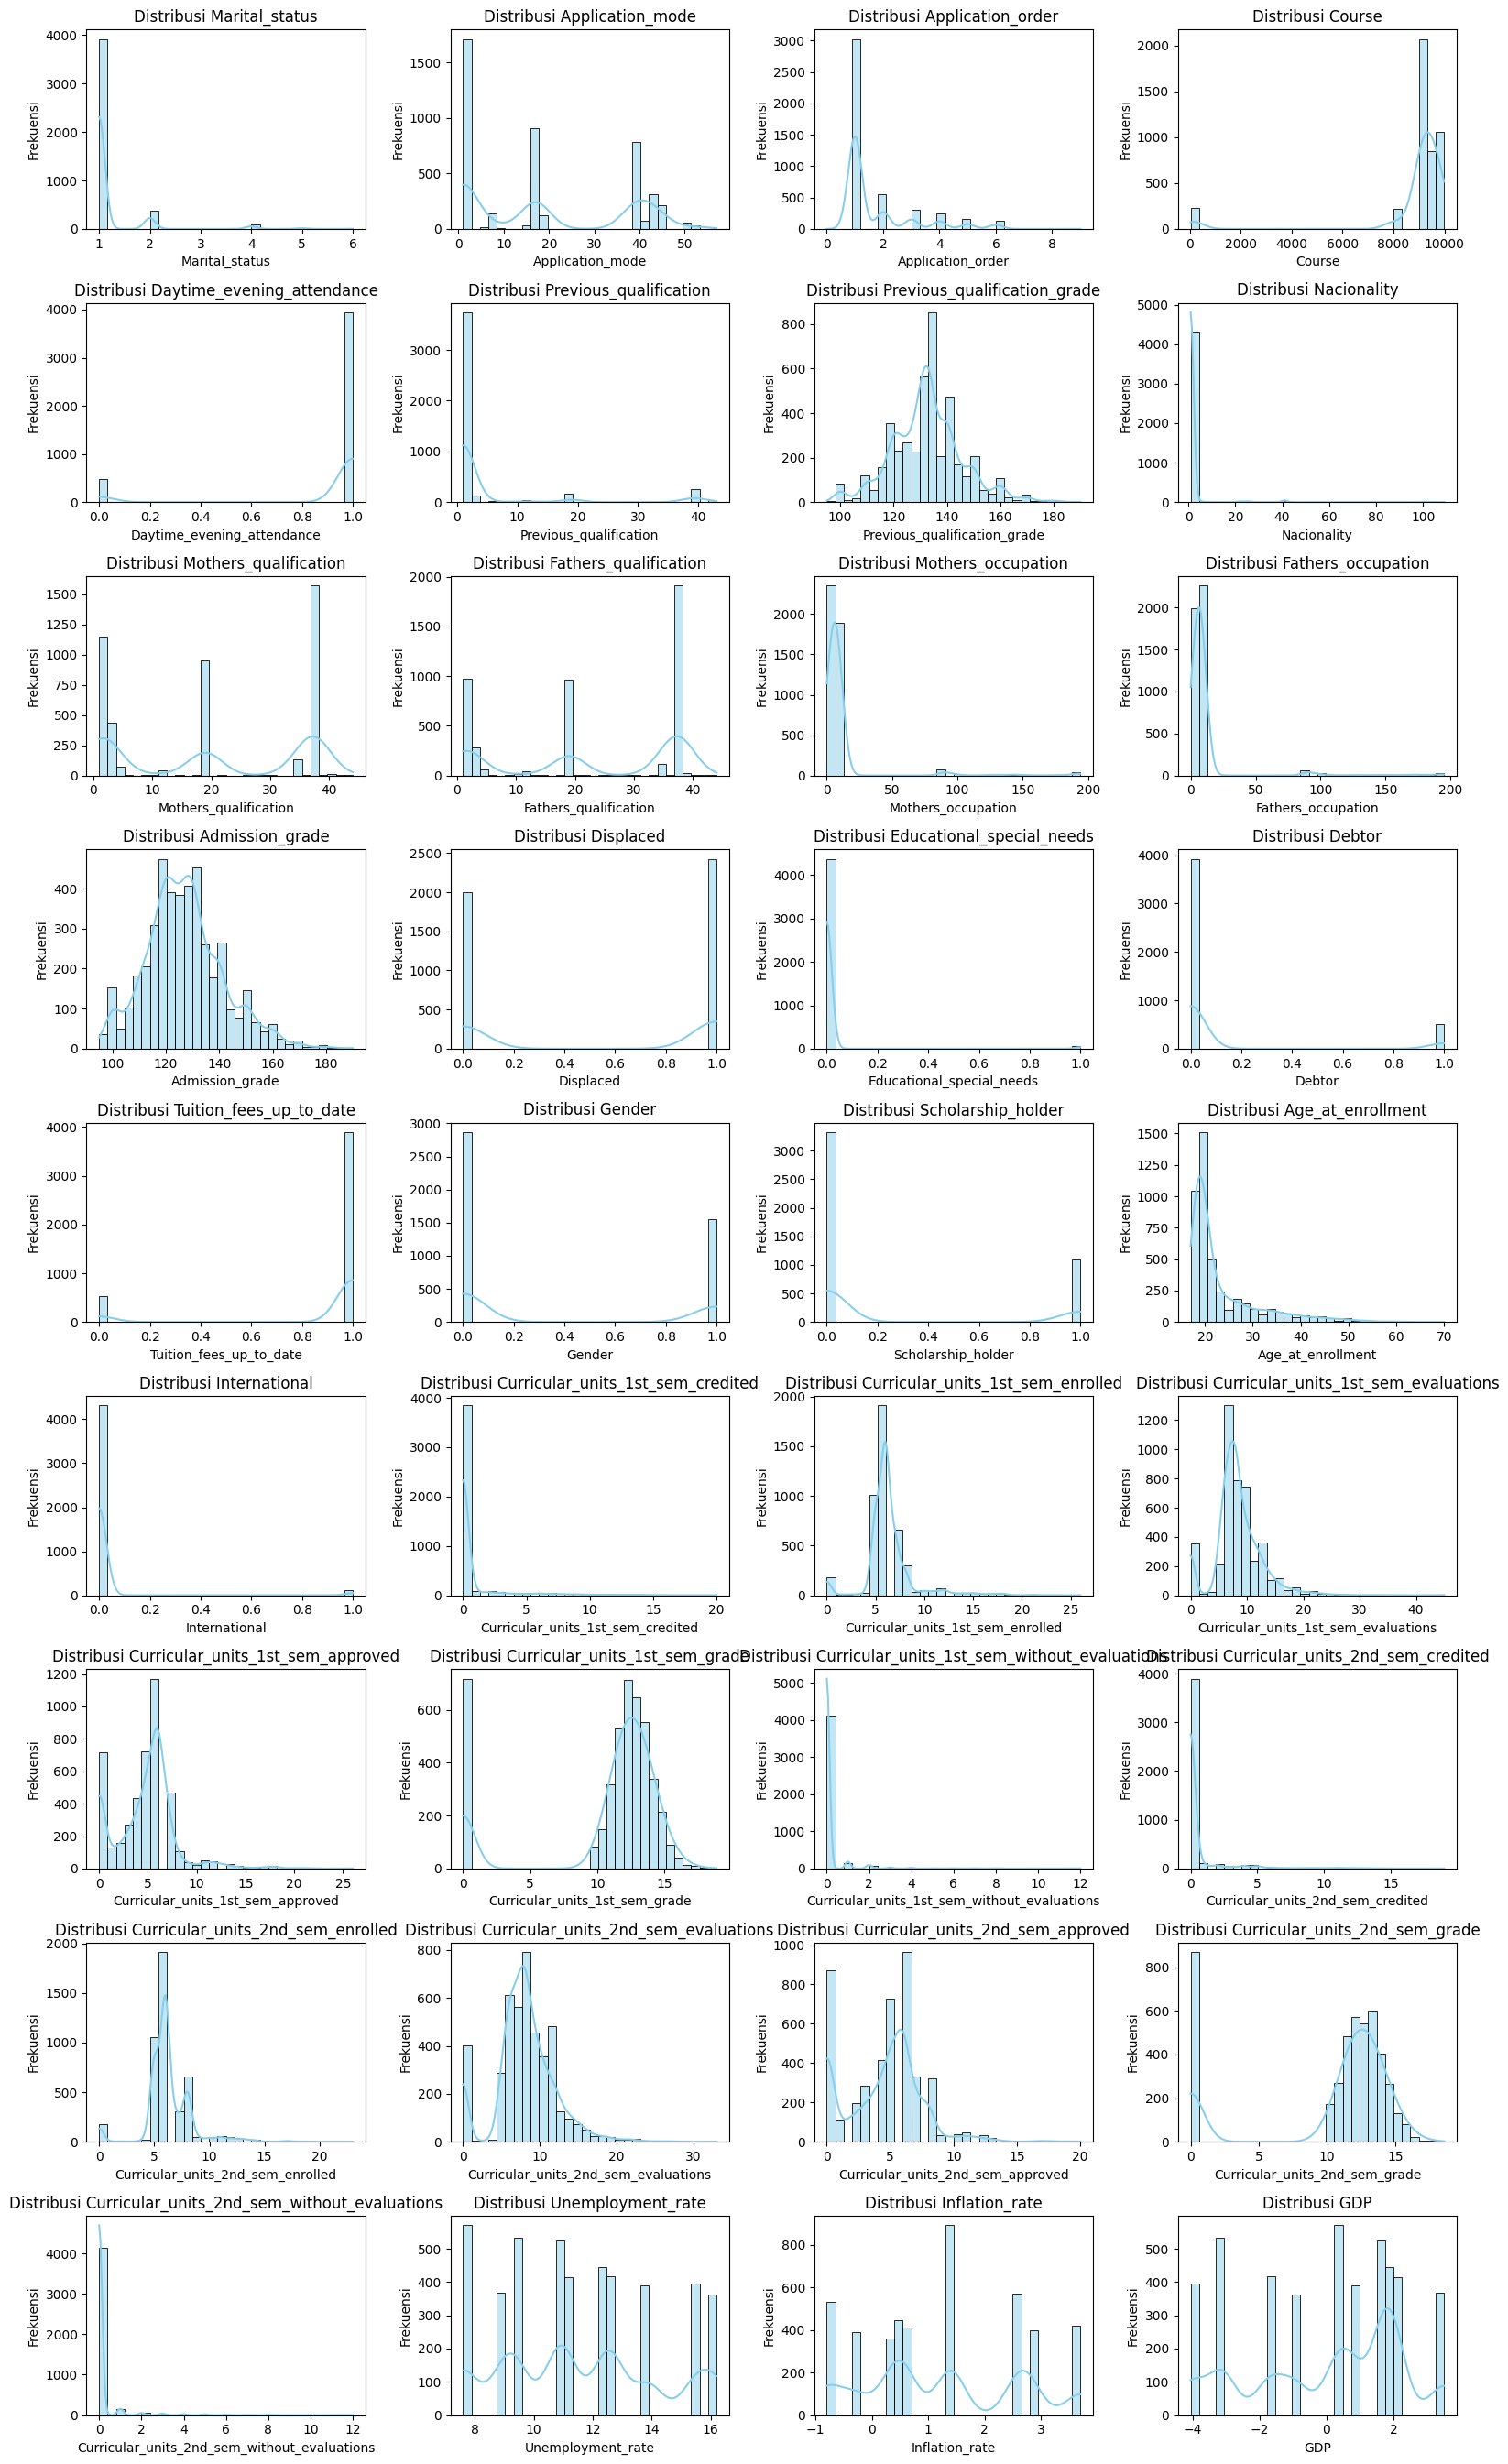

In [ ]:
cols_per_row = 4
total_plots = len(num_features)
rows = (total_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))

axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Categorical

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_features)}")

Categorical columns: 1


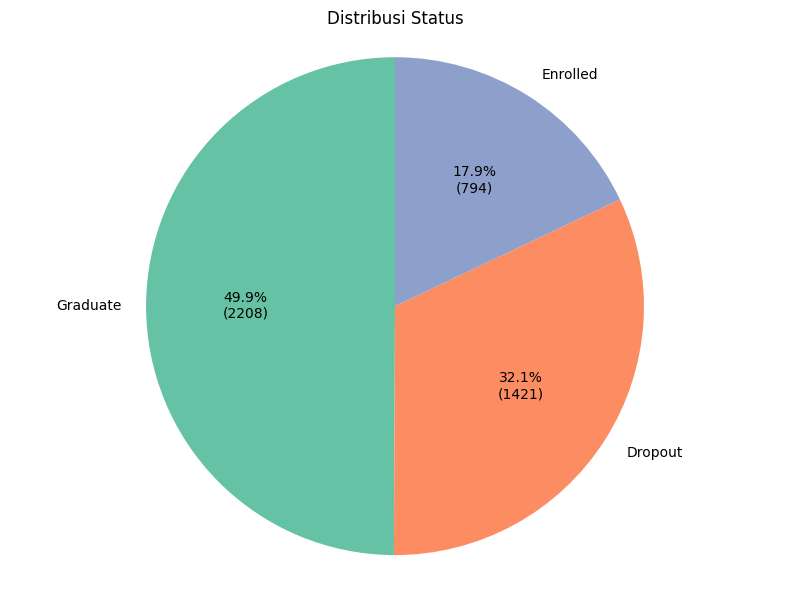

In [ ]:
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes),
            startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Distribusi {col}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Beberapa insight dari Univariate Analysis:
- Terdapat 3 kategori dari 'Status' yaitu Droput, Enrolled, dan Graduate. Tetapi ditribusinya tidak seimbang, mahasiswa dengan status 'Graduate' lebih mendominasi.
- Sebagian besar usia mahasiswa saat masuk yaitu berusia 20-an.
- Fitur yang berkaitan dengan akademik seperti nilai memiliki distribusi yang beragam.

### Bivariate Analysis

Dilakukan untuk mengetahui apakah dan bagaiman fitur-fitur lain berhubungan dengan target dalam hal ini 'Status', divisualisasikan dengan menggunakan barplot

<ipython-input-12-c754b38e827a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Status', y=col, data=df, ax=axes[i], ci=None, palette='Set2')
<ipython-input-12-c754b38e827a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y=col, data=df, ax=axes[i], ci=None, palette='Set2')
<ipython-input-12-c754b38e827a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Status', y=col, data=df, ax=axes[i], ci=None, palette='Set2')
<ipython-input-12-c754b38e827a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y=col, data=df, ax=axes[i], ci=None, palette=

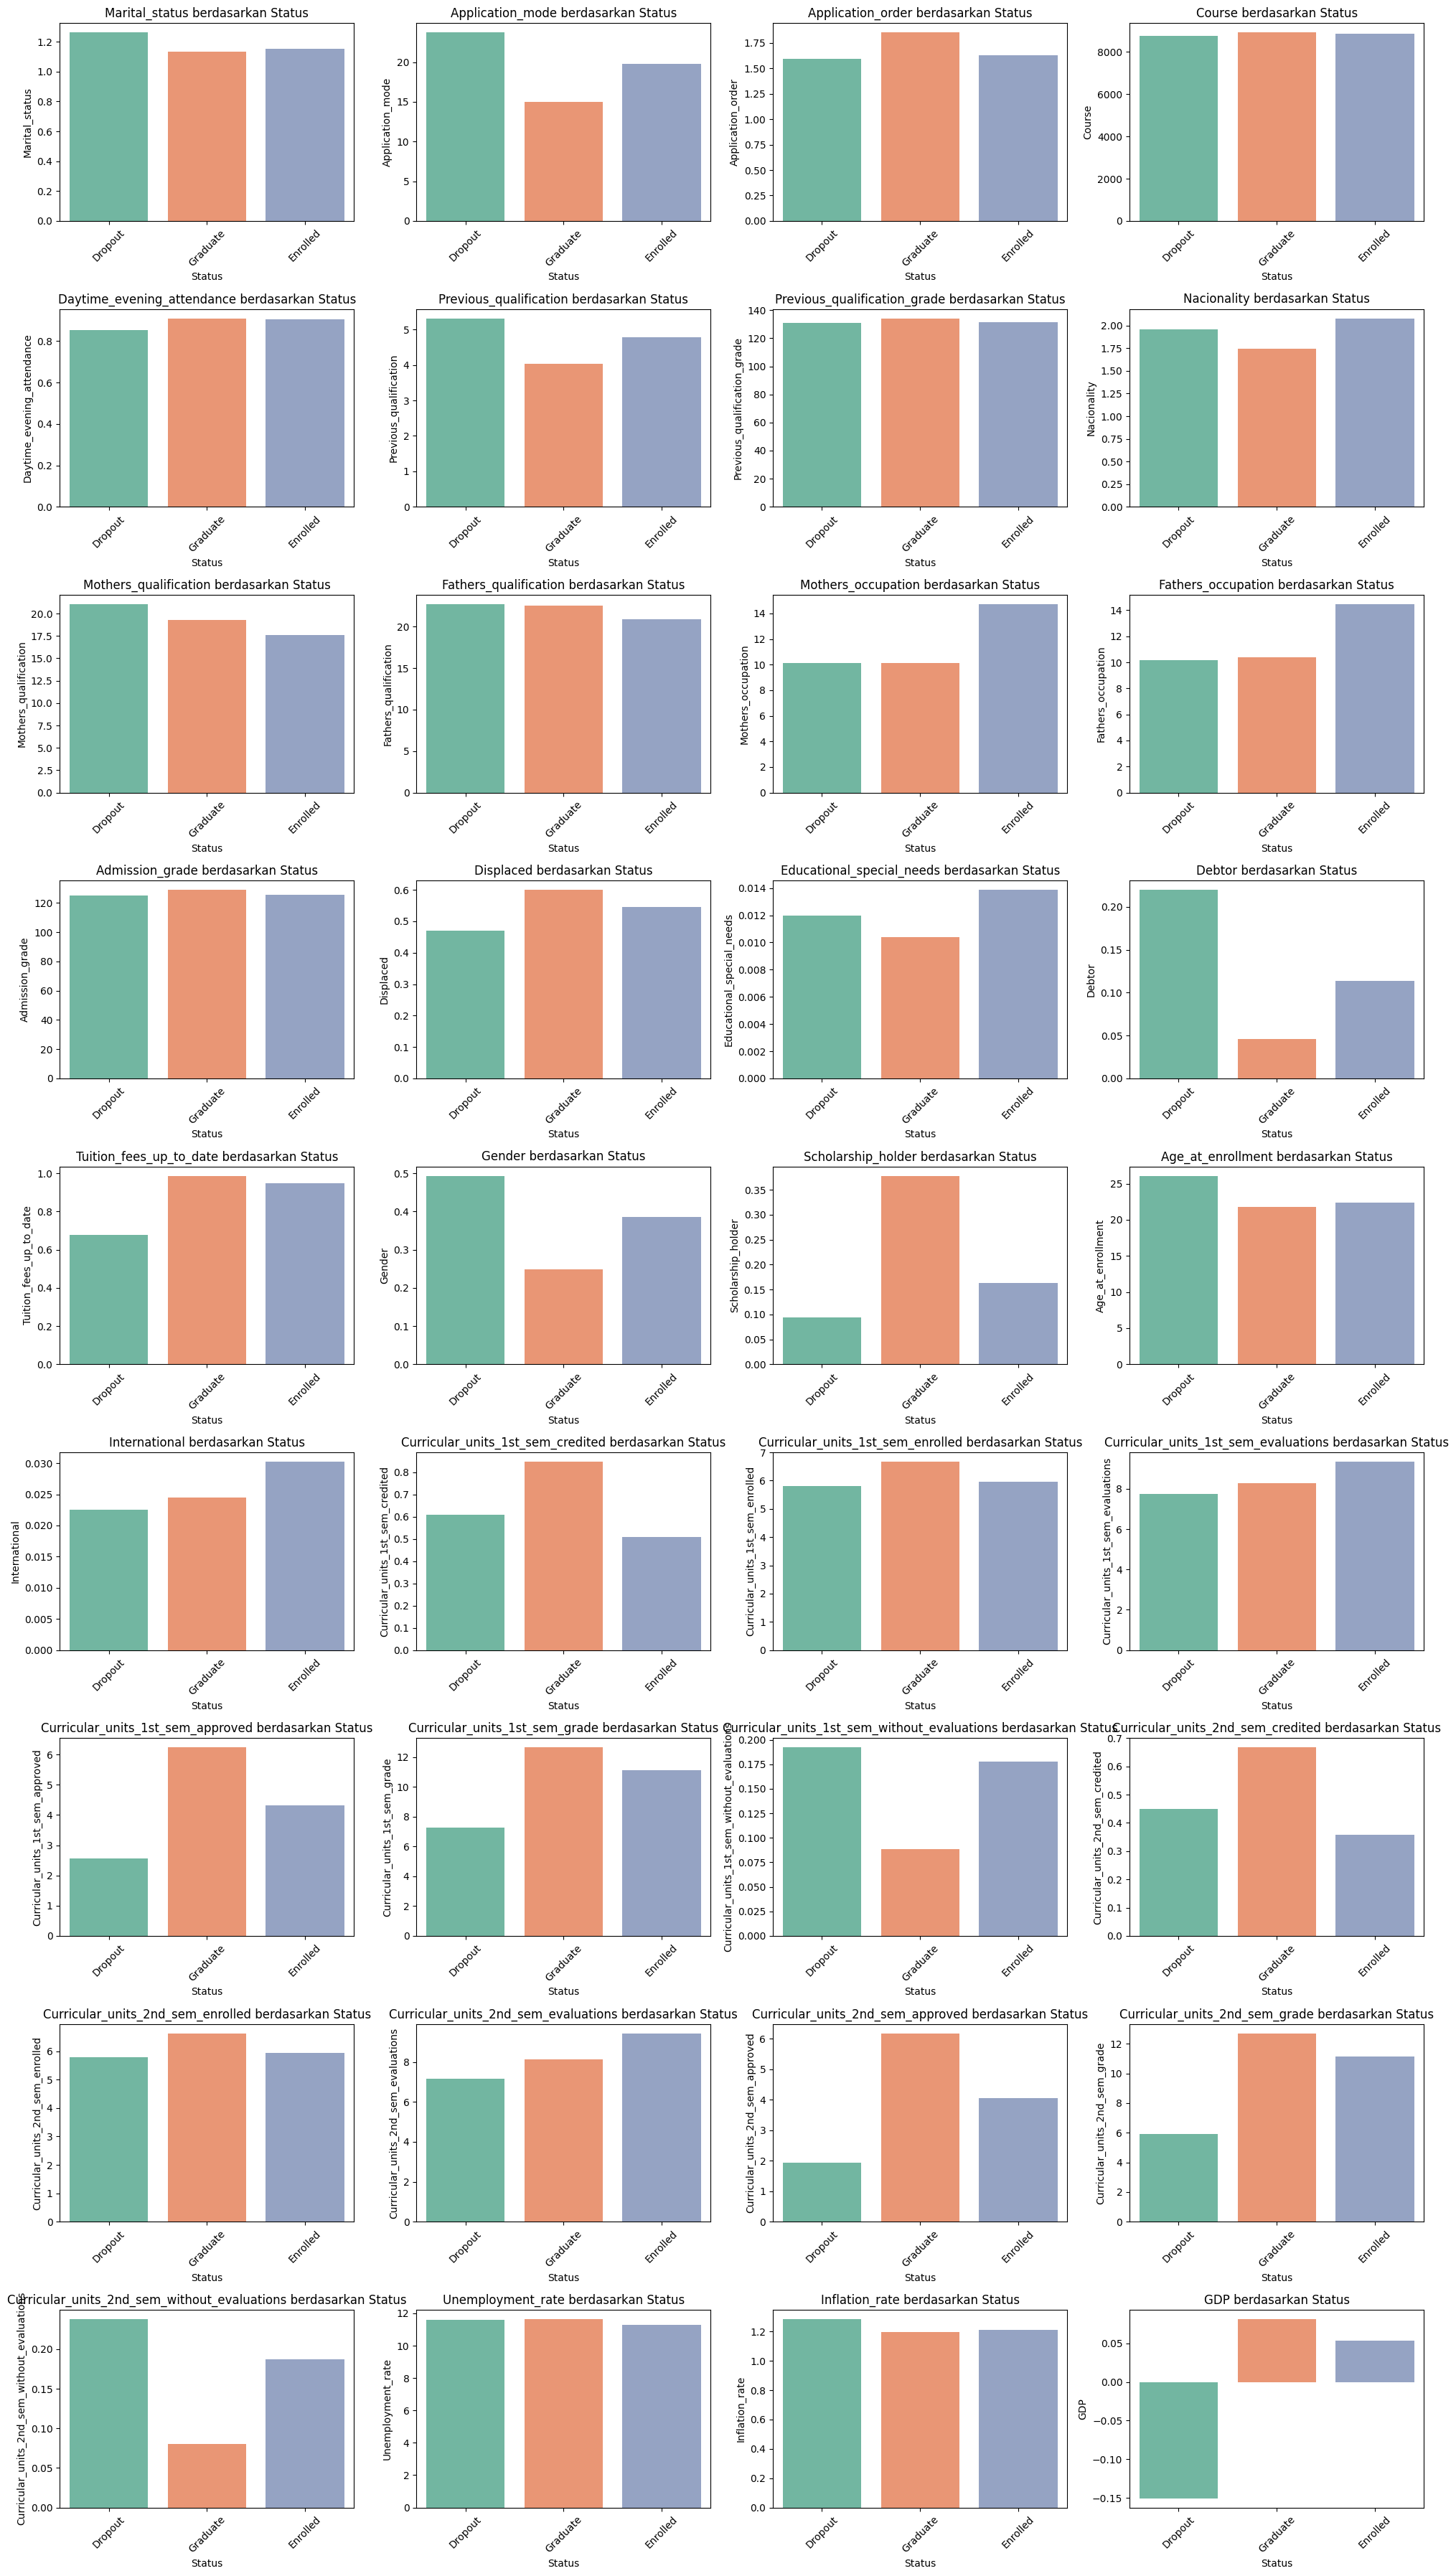

In [ ]:
cols_per_row = 4
total_plots = len(num_features)
rows = (total_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.barplot(x='Status', y=col, data=df, ax=axes[i], ci=None, palette='Set2')
    axes[i].set_title(f'{col} berdasarkan Status')
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Beberapa insight dari bivariate analysis:
- Mahasiswa yang terindikasi dropout cenderung memiliki nilai yang rendah saat semester 1 dan 2. Nilai saat masuk juga mempengaruhi status kelulusan, mahasiswa yang memiliki nilai masuk tinggi cenderung berhasil lulus.
- Mahasiswa yang memiliki debtor (hutang) kemungkinan memiliki resiko dropout yang lebih besar.
- Beasiswa mempengaruhi status kelulusan yang ditunjukkan dengan status Graduate didominasi oleh mahasiswa penerima beasiswa.
- Mahasiswa yang berusia lebih tua saat mendaftar lebih cenderung untuk dropout.


### Multivariate Analysis

Dilakukan dengan melibatkan lebih dari dua variabel secara bersamaan untuk memahami bagaimana mereka saling berhubungan dan memengaruhi variabel target atau antar satu sama lain. Multivariate analysis dapat divisualisasikan dengan menggunakan heatmp maupun pairplot.

Text(0.5, 1.0, 'Korelasi Fitur Numerik')

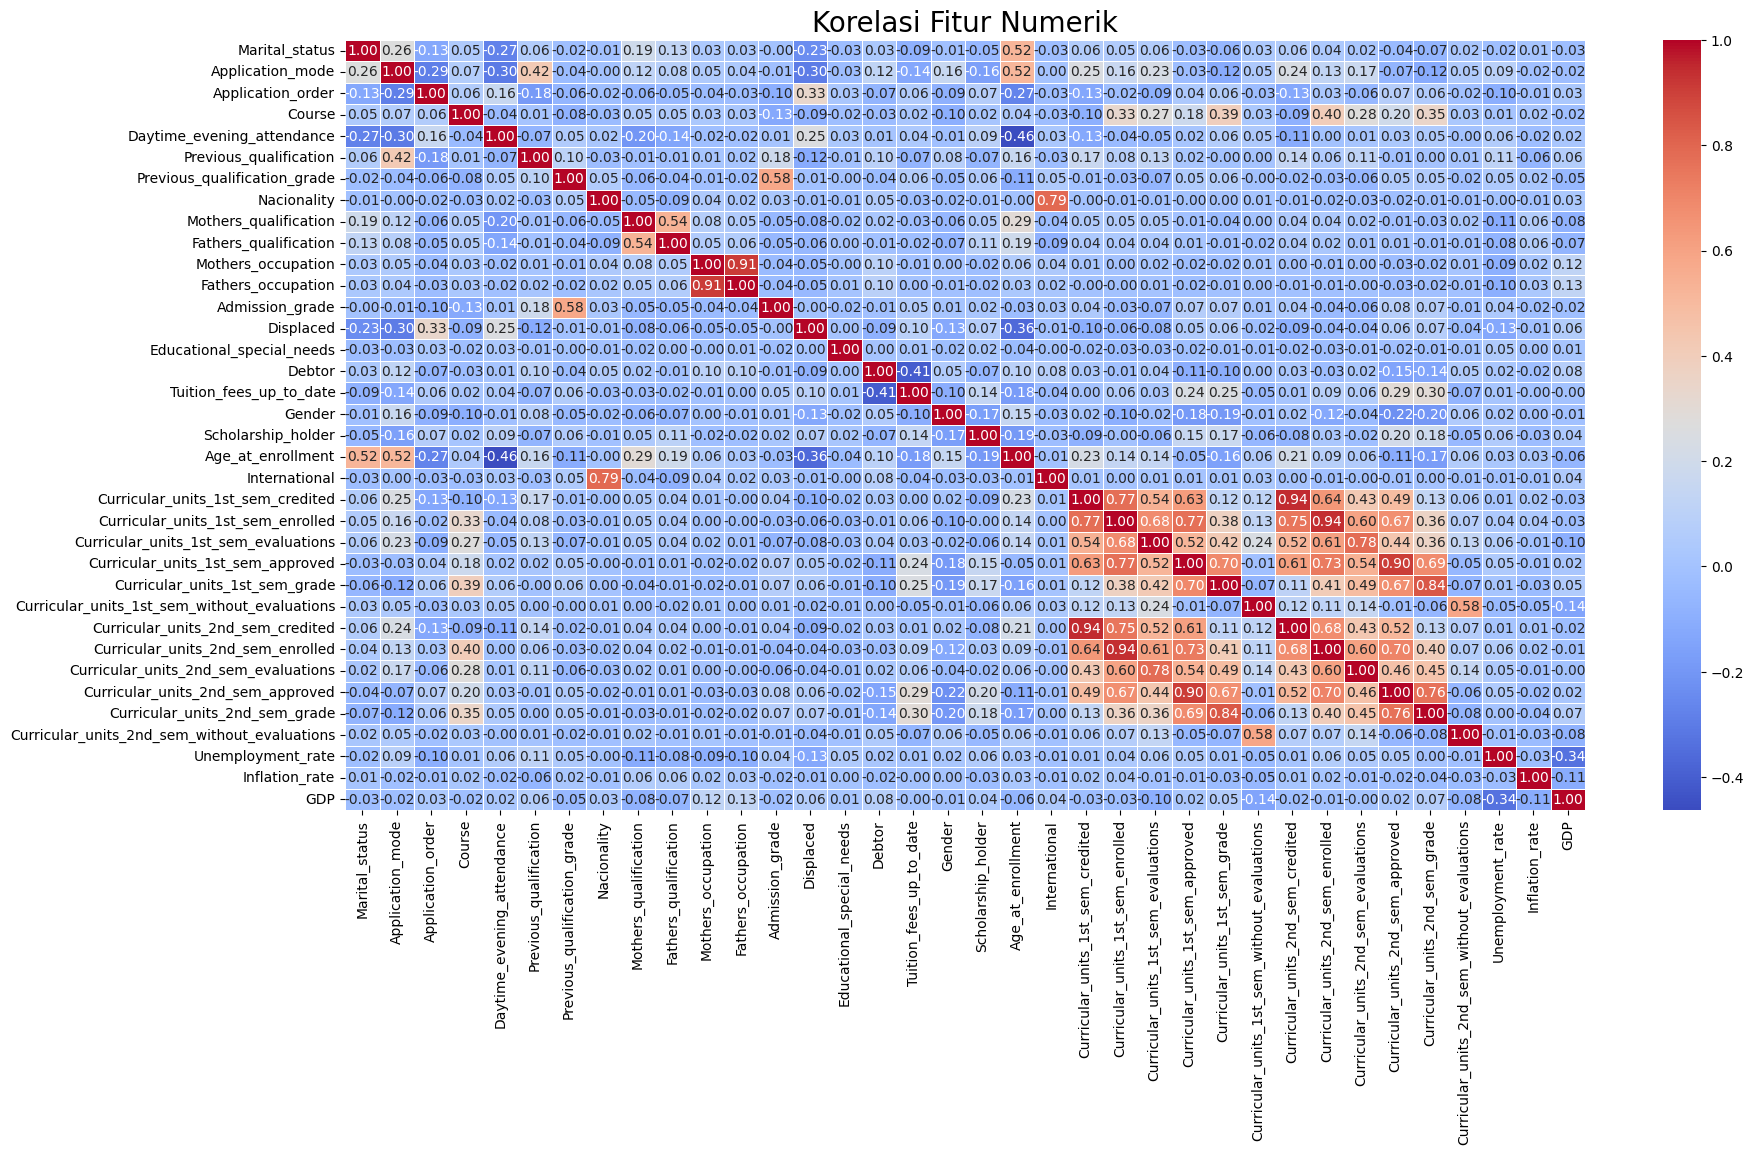

In [ ]:
plt.figure(figsize=(20, 10))
corr_matrix=df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Korelasi Fitur Numerik", size=20)

In [ ]:
#Identifikasi korelasi tertinggi
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1.0) & (high_corr > 0.7)]
if len(high_corr) > 0:
    print("\nHighly correlated features (|correlation| > 0.7):")
    display(high_corr)


Highly correlated features (|correlation| > 0.7):


,,0
Curricular_units_2nd_sem_credited,Curricular_units_1st_sem_credited,0.944811
Curricular_units_1st_sem_credited,Curricular_units_2nd_sem_credited,0.944811
Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,0.942627
Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_enrolled,0.942627
Fathers_occupation,Mothers_occupation,0.910472
Mothers_occupation,Fathers_occupation,0.910472
Curricular_units_2nd_sem_approved,Curricular_units_1st_sem_approved,0.904002
Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_approved,0.904002
Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade,0.837170
Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_grade,0.837170


Mencari 10 fitur dengan nilai korelasi tertinggi dengan kolom status

<ipython-input-19-86117158df46>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapping['Status'] = df['Status'].replace(status_mapping)
<ipython-input-19-86117158df46>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")


Feature correlated with Status:
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362

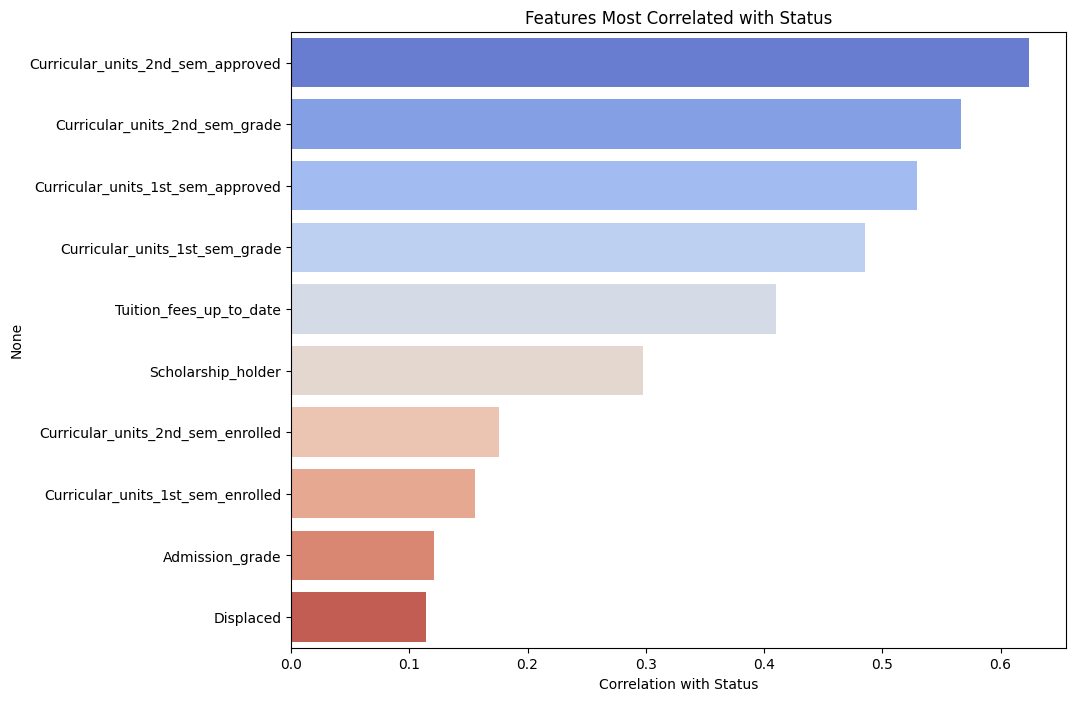

In [ ]:
status_mapping = {'Dropout': 0,'Enrolled':1,'Graduate': 2}
df_mapping = df.copy()
df_mapping['Status'] = df['Status'].replace(status_mapping)
df_encoded = pd.get_dummies(df_mapping, columns=[col for col in categorical_features if col != 'Status'], drop_first=True)
corr_matrix=  df_encoded.corr()
status_correlation = corr_matrix["Status"].sort_values(ascending=False)
factors = status_correlation
factors = factors.drop('Status')

print("Feature correlated with Status:")
print(factors)

plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

In [ ]:
key_features = [
    'Admission_grade', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_approved', 'Age_at_enrollment'
]

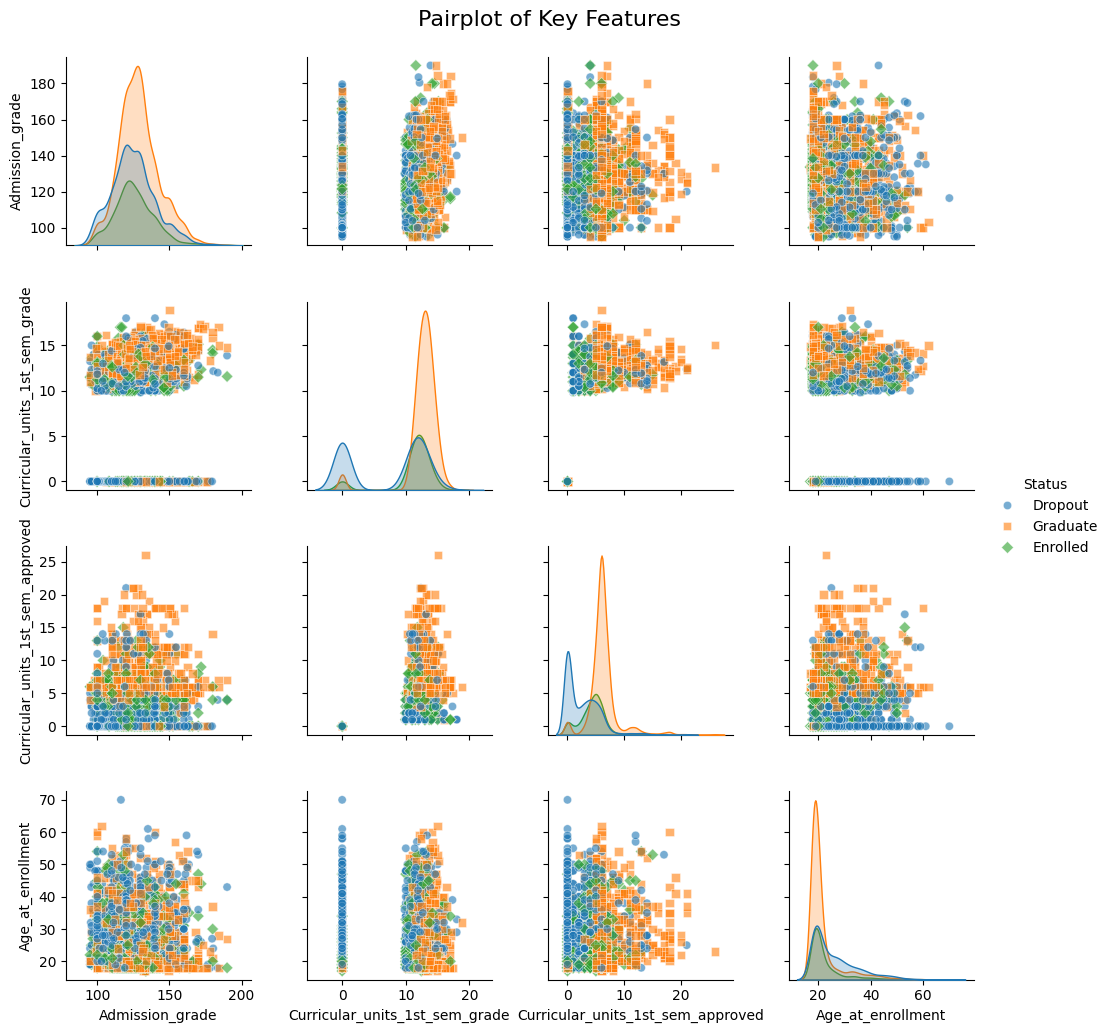

In [ ]:
pair = sns.pairplot(df[key_features + ['Status']], hue='Status', markers=['o', 's', 'D'],
                    plot_kws={'alpha': 0.6}, height=2.5)

pair.fig.suptitle('Pairplot of Key Features', y=1.03, fontsize=16)

pair.fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

Beberapa insight dari multivariate analysis:
- Berdasarkan visualisasi korelasi dengan heatmap menunjukkan beberapa fitur saling berkorelasi sangat tinggi seperti Curricular_units_1st_sem_approved vs Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_approved vs Curricular_units_2nd_sem_grade. Namun juga terdapat fitur yang hampir tidak berkorelasi seperti Educational_special_needs dan Unemployment_rate dengan fitur lain (semua nilai mendekati nol)
- Berdasarkan visualisasi pairplot menghasilkan beberapa temuan diantaranya:
  - Nilai masuk tinggi → lebih mungkin Graduate, rendah → cenderung Dropout
  - Nilai semester 1 tinggi → kemungkinan Graduate, rendah → Dropout
  - Mirip pola dengan grade, validasi hubungan keduanya kuat
  - Usia masuk lebih tua → lebih rentan Dropout, usia muda → lebih besar Graduate

## Data Preparation / Preprocessing

In [ ]:
df_fix = df.copy()

### Mapping
Dilakukan untuk memetakan atau mengonversi nilai-nilai numerik (kode angka) menjadi label yang lebih mudah dibaca dan dipahami oleh manusia.

In [ ]:
marital_status_map = {
    1: 'single', 2: 'married', 3: 'widower', 4: 'divorced',
    5: 'facto union', 6: 'legally separated'
}

occupation_map = {
    0: 'Student', 1: 'Legislative/Executive', 2: 'Scientific specialists',
    3: 'Technicians', 4: 'Admin staff', 5: 'Services/Sellers',
    6: 'Agriculture/Fisheries', 7: 'Industry/Construction',
    8: 'Machine Operators', 9: 'Unskilled Workers',
    10: 'Armed Forces', 90: 'Other', 99: 'Blank', 101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants', 103: 'Other Armed Forces',
    112: 'Admin/Commercial Directors', 114: 'Hotel/Trade Directors',
    121: 'Science/Engineering Specialists', 122: 'Health professionals',
    123: 'Teachers', 124: 'Finance/Admin Specialists', 125: 'ICT Specialists',
    131: 'Science/Engineering Technicians', 132: 'Health Technicians',
    134: 'Legal/Social/Cultural Technicians', 135: 'ICT Technicians',
    141: 'Secretaries/Data Operators', 143: 'Finance/Admin Operators',
    144: 'Other Admin Support', 151: 'Personal service workers', 152: 'Sellers',
    153: 'Personal care workers', 154: 'Security services',
    161: 'Farmers (market)', 163: 'Subsistence farmers', 171: 'Construction workers',
    172: 'Metallurgy workers', 173: 'Artisan/Precision workers', 174: 'Electricians/Electronics',
    175: 'Processing workers', 181: 'Plant operators', 182: 'Assembly workers',
    183: 'Drivers/Operators', 191: 'Cleaners', 192: 'Unskilled in agriculture',
    193: 'Unskilled in industry', 194: 'Meal assistants', 195: 'Street vendors'
}

previous_qualification_map = {
    1: "Secondary education", 2: "Higher education - bachelor's degree",
    3: "Higher education - degree", 4: "Higher education - master's",
    5: "Higher education - doctorate", 6: "Frequency of higher education",
    9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling", 14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle", 38: "Basic education 2nd cycle",
    39: "Technological specialization", 40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical", 43: "Higher education - master (2nd cycle)"
}

binary_map = {1: 'yes', 0: 'no'}
gender_map = {1: 'male', 0: 'female'}

daytime_map = {1: 'daytime', 0: 'evening'}


nationality_map = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
    13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
    22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean',
    32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
}

course_map = {
    33: 'Biofuel Production', 171: 'Animation/Multimedia', 8014: 'Social Service (evening)',
    9003: 'Agronomy', 9070: 'Communication Design', 9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering', 9130: 'Equinculture', 9147: 'Management',
    9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene',
    9670: 'Ad/Marketing', 9773: 'Journalism', 9853: 'Basic Education', 9991: 'Management (evening)'
}

application_mode_map = {
    1: '1st phase - general', 2: 'Ordinance 612/93', 5: 'Special - Azores',
    7: 'Other higher courses', 10: 'Ordinance 854-B/99', 15: 'International student',
    16: 'Special - Madeira', 17: '2nd phase - general', 18: '3rd phase - general',
    26: 'Different Plan', 27: 'Other Institution', 39: 'Over 23 years old',
    42: 'Transfer', 43: 'Change course', 44: 'Tech diploma',
    51: 'Change institution/course', 53: 'Short cycle diploma',
    57: 'Change institution/course (Int.)'
}

In [ ]:
df_fix['Marital_status'] = df_fix['Marital_status'].map(marital_status_map)
df_fix['Mothers_occupation'] = df_fix['Mothers_occupation'].map(occupation_map)
df_fix['Fathers_occupation'] = df_fix['Fathers_occupation'].map(occupation_map)
df_fix['Previous_qualification'] = df_fix['Previous_qualification'].map(previous_qualification_map)
df_fix['Displaced'] = df_fix['Displaced'].map(binary_map)
df_fix['Educational_special_needs'] = df_fix['Educational_special_needs'].map(binary_map)
df_fix['Debtor'] = df_fix['Debtor'].map(binary_map)
df_fix['Tuition_fees_up_to_date'] = df_fix['Tuition_fees_up_to_date'].map(binary_map)
df_fix['International'] = df_fix['International'].map(binary_map)
df_fix['Scholarship_holder'] = df_fix['Scholarship_holder'].map(binary_map)
df_fix['Gender'] = df_fix['Gender'].map(gender_map)
df_fix['Daytime_evening_attendance'] = df_fix['Daytime_evening_attendance'].map(daytime_map)
df_fix['Nacionality'] = df_fix['Nacionality'].map(nationality_map)
df_fix['Course'] = df_fix['Course'].map(course_map)
df_fix['Application_mode'] = df_fix['Application_mode'].map(application_mode_map)
df_fix

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general,5,Animation/Multimedia,daytime,Secondary education,122.0,Portuguese,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student,1,Tourism,daytime,Secondary education,160.0,Portuguese,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general,5,Communication Design,daytime,Secondary education,122.0,Portuguese,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general,2,Journalism,daytime,Secondary education,122.0,Portuguese,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening),evening,Secondary education,100.0,Portuguese,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general,6,Journalism,daytime,Secondary education,125.0,Portuguese,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general,2,Journalism,daytime,Secondary education,120.0,Russian,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general,1,Nursing,daytime,Secondary education,154.0,Portuguese,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general,1,Management,daytime,Secondary education,180.0,Portuguese,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Melihat insight korelasi beberapa fitur dengan target

<ipython-input-27-99d2c983eee9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Status', y='Admission_grade', data=df_fix, palette='Set2', ci=None)
<ipython-input-27-99d2c983eee9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Status', y='Admission_grade', data=df_fix, palette='Set2', ci=None)


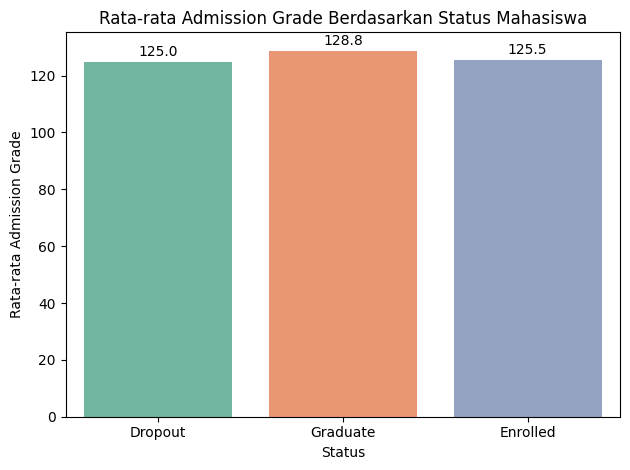

In [ ]:
#Apakah admission grade mempengaruhi status mahasiswa?
ax = sns.barplot(x='Status', y='Admission_grade', data=df_fix, palette='Set2', ci=None)

plt.title('Rata-rata Admission Grade Berdasarkan Status Mahasiswa')
plt.ylabel('Rata-rata Admission Grade')
plt.xlabel('Status')
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 1, f'{y:.1f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Mahasiswa dengan status 'Graduate' cenderung memeiliki rata-rata nilai masuk yang tinggi.

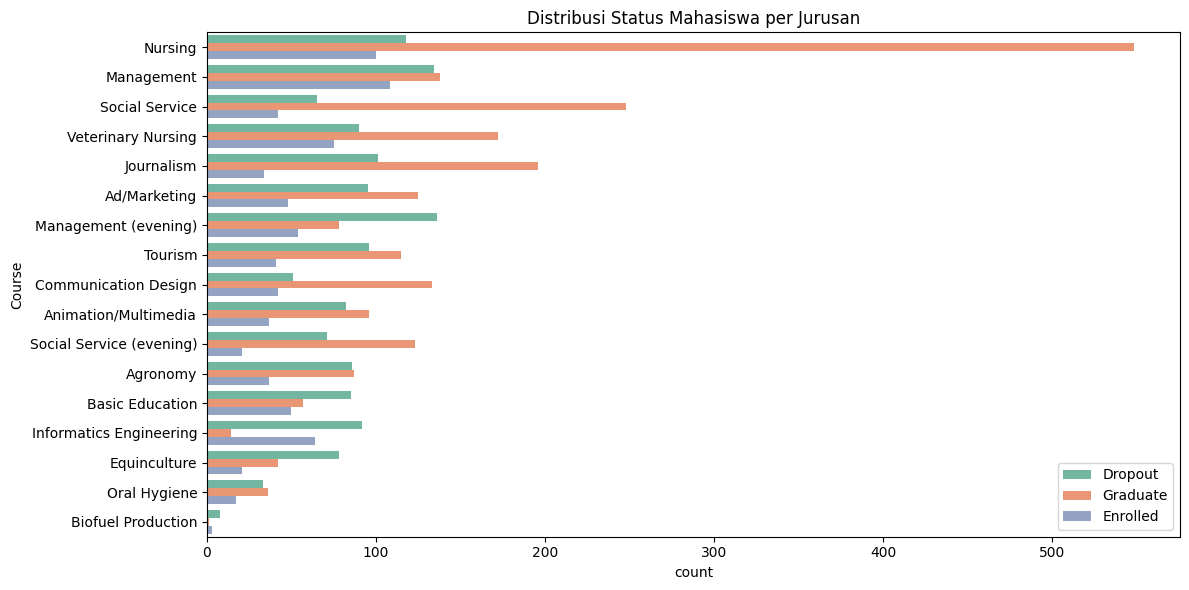

Jumlah Mahasiswa per Jurusan dan Status:

Status                    Dropout  Enrolled  Graduate
Course                                               
Ad/Marketing                   95        48       125
Agronomy                       86        37        87
Animation/Multimedia           82        37        96
Basic Education                85        50        57
Biofuel Production              8         3         1
Communication Design           51        42       133
Equinculture                   78        21        42
Informatics Engineering        92        64        14
Journalism                    101        34       196
Management                    134       108       138
Management (evening)          136        54        78
Nursing                       118       100       548
Oral Hygiene                   33        17        36
Social Service                 65        42       248
Social Service (evening)       71        21       123
Tourism                        96       

In [ ]:
#Bagaimana status mahasiswa di tiap jurusan?
plt.figure(figsize=(12, 6))
sns.countplot(y='Course', hue='Status', data=df_fix, palette='Set2', order=df_fix['Course'].value_counts().index)
plt.title('Distribusi Status Mahasiswa per Jurusan')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print("Jumlah Mahasiswa per Jurusan dan Status:\n")
status_counts = df_fix.groupby(['Course', 'Status']).size().unstack(fill_value=0)
print(status_counts)

Mahasiswa dengan status 'Dropout' paling banyak dijumpai pada jurusan Management (evening), sedangkan status 'Graduate' didominasi oleh jurusan Social Service

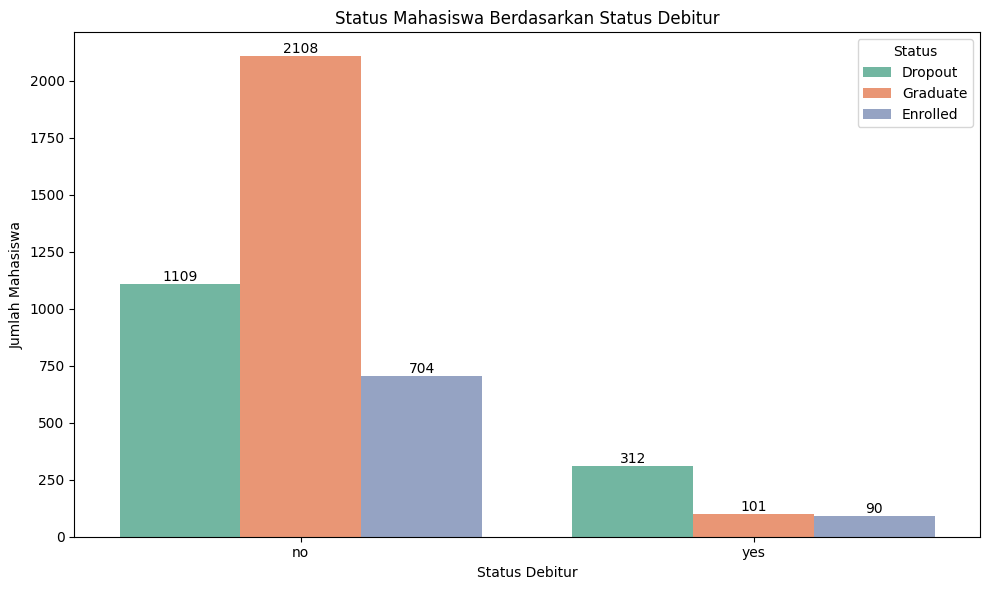

In [ ]:
#Apakah status debitur mempengaruhi status mahasiswa?
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Debtor', hue='Status', data=df_fix, palette='Set2')

plt.title('Status Mahasiswa Berdasarkan Status Debitur')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('Status Debitur')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Status 'Graduate' didominasi oleh mahasiswa yang tidak memiliki hutang/debtor.

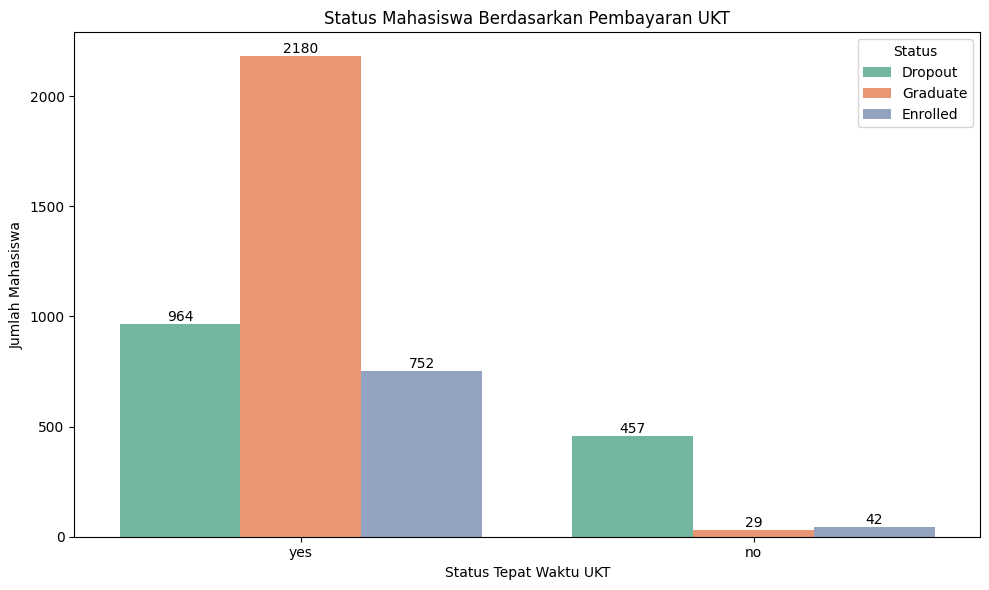

In [ ]:
#Apakah ketepatan pembayaran UKT mempengaruhi status mahasiswa?
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df_fix, palette='Set2')

plt.title('Status Mahasiswa Berdasarkan Pembayaran UKT')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('Status Tepat Waktu UKT')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Mahasiswa yang membayar UKT tepat waktu cenderung lulus.

<ipython-input-31-318124ce463c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_fix, palette='Set2', ci=None)
<ipython-input-31-318124ce463c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_fix, palette='Set2', ci=None)


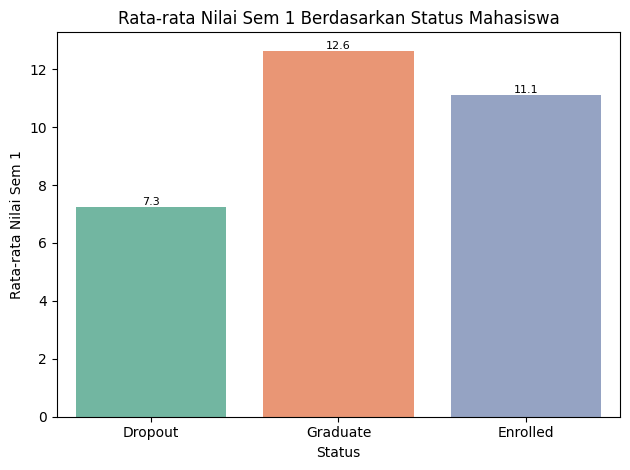

In [ ]:
#Apakah nilai semester 1 dan 2 mempengaruhi status mahasiswa?
ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_grade', data=df_fix, palette='Set2', ci=None)

plt.title('Rata-rata Nilai Sem 1 Berdasarkan Status Mahasiswa')
plt.ylabel('Rata-rata Nilai Sem 1')
plt.xlabel('Status')
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y , f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

<ipython-input-32-39baaac39a52>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df_fix, palette='Set2', ci=None)
<ipython-input-32-39baaac39a52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df_fix, palette='Set2', ci=None)


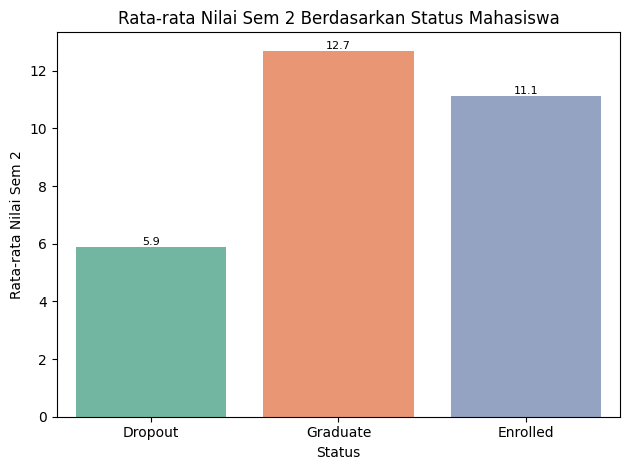

In [ ]:
#Apakah nilai semester 1 dan 2 mempengaruhi status mahasiswa?
ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df_fix, palette='Set2', ci=None)

plt.title('Rata-rata Nilai Sem 2 Berdasarkan Status Mahasiswa')
plt.ylabel('Rata-rata Nilai Sem 2')
plt.xlabel('Status')
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

<ipython-input-33-1617906dee3c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_fix, palette='Set2', ci=None)
<ipython-input-33-1617906dee3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_fix, palette='Set2', ci=None)


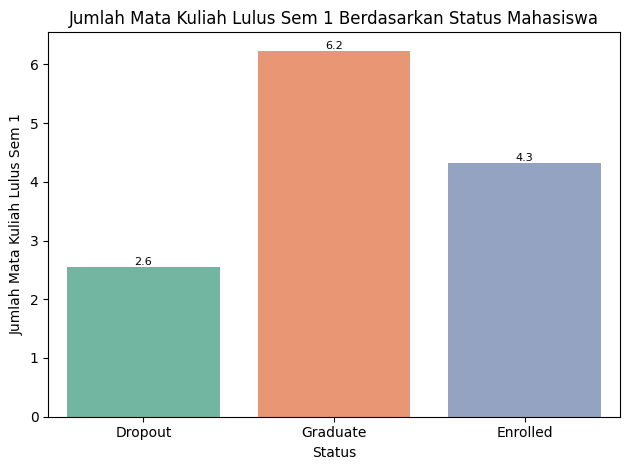

In [ ]:
#Apakah jumlah mata kuliah lulus di sem 1 dan 2 mempengaruhi status mahasiswa?
ax = sns.barplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_fix, palette='Set2', ci=None)

plt.title('Jumlah Mata Kuliah Lulus Sem 1 Berdasarkan Status Mahasiswa')
plt.ylabel('Jumlah Mata Kuliah Lulus Sem 1')
plt.xlabel('Status')
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y , f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

<ipython-input-34-718a2584bc7e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df_fix, palette='Set2', ci=None)
<ipython-input-34-718a2584bc7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df_fix, palette='Set2', ci=None)


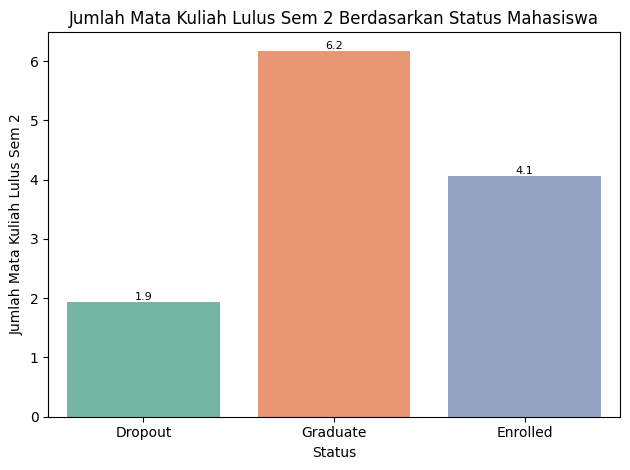

In [ ]:
#Apakah jumlah mata kuliah lulus di sem 1 dan 2 mempengaruhi status mahasiswa?
ax = sns.barplot(x='Status', y='Curricular_units_2nd_sem_approved', data=df_fix, palette='Set2', ci=None)

plt.title('Jumlah Mata Kuliah Lulus Sem 2 Berdasarkan Status Mahasiswa')
plt.ylabel('Jumlah Mata Kuliah Lulus Sem 2')
plt.xlabel('Status')
plt.xticks(rotation=0)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

Nilai dan jumlah mata kuliah yang lulus di semester 1 dan 2 mempengaruhi status mahasiswa, yang mana mahasiswa dropout cenderung memiliki nilai dan jumlah mata kuliah lulus lebih rendah/kecil sedangkan mahasiswa graduate memiliki nilai dan jumlah mata kuliah lulus lebih tinggi/besar.

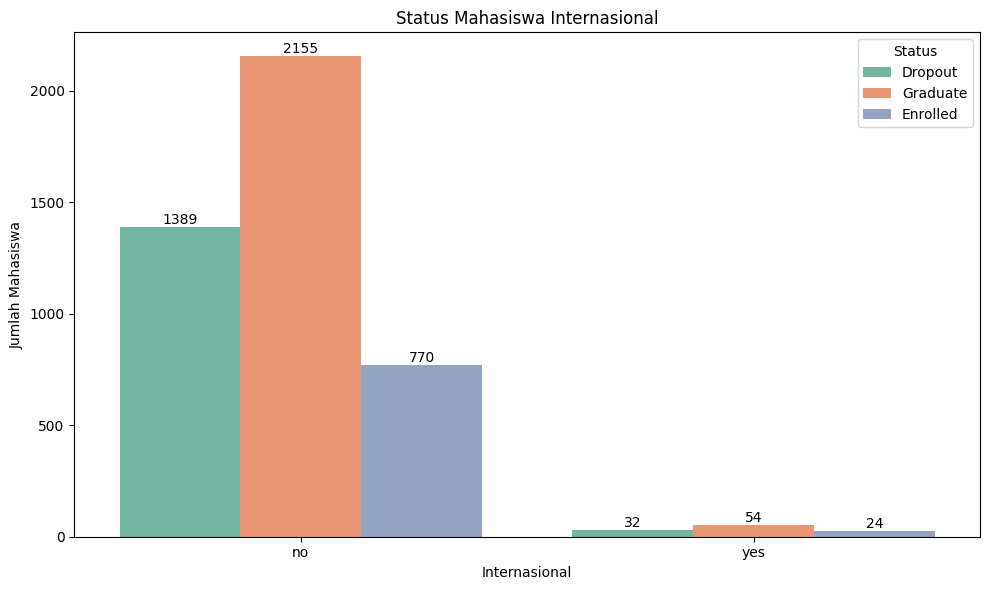

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='International', hue='Status', data=df_fix, palette='Set2')

plt.title('Status Mahasiswa Internasional')
plt.ylabel('Jumlah Mahasiswa')
plt.xlabel('Internasional')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Mahasiswa lokal (bukan internasional) lebih mendominasi status 'Graduate'.

In [ ]:
df_fix.to_csv('df_fix.csv', index=False)

## Modeling

### Proses Encoding Label

Mengubah nilai kategorikal (string) pada kolom Status menjadi nilai numerik agar bisa digunakan dalam analisis atau algoritma machine learning.

In [ ]:
le = LabelEncoder()
df['Status_Encode'] = le.fit_transform(df['Status'])

In [ ]:
df.head(20)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Status_Encode
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
5,2,39,1,9991,0,19,133.1,1,37,37,...,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate,2
6,1,1,1,9500,1,1,142.0,1,19,38,...,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate,2
7,1,18,4,9254,1,1,119.0,1,37,37,...,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate,2
9,1,1,1,9238,1,1,138.0,1,1,19,...,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout,0


Hasil dari status yang telah di encode yaitu:
- 0 = Dropout
- 1 = Enrolled
- 2 = Graduate

### Pisahkan fitur dan target

Fitur yang digunakan hanya 10 kolom yang memiliki korelasi tertinggi dengan target agar komputasi lebih optimal.

In [ ]:
X = df[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = df['Status_Encode']

In [ ]:
y

,Status_Encode
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


### Split data dengan proporsi 80% data train, 20% data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Normalisasi fitur numerik dengan standar scaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

### Prediksi

In [ ]:
y_pred = rf_model.predict(X_test_scaled)

## Evaluation

In [ ]:
print("=== EVALUASI MODEL RANDOM FOREST ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== EVALUASI MODEL RANDOM FOREST ===
Accuracy: 0.7661

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       284
           1       0.52      0.42      0.46       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.69      0.69       885
weighted avg       0.76      0.77      0.76       885



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[203  40  41]
 [ 33  66  60]
 [ 12  21 409]]


In [ ]:
#Feature Importance
feature_names = X.columns
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance.head(10))


=== FEATURE IMPORTANCE ===
                             feature  importance
0  Curricular_units_2nd_sem_approved    0.283523
1     Curricular_units_2nd_sem_grade    0.153484
2  Curricular_units_1st_sem_approved    0.152354
8                    Admission_grade    0.103970
3     Curricular_units_1st_sem_grade    0.087057
4            Tuition_fees_up_to_date    0.079697
6  Curricular_units_2nd_sem_enrolled    0.053281
7  Curricular_units_1st_sem_enrolled    0.047388
5                 Scholarship_holder    0.025395
9                          Displaced    0.013852


In [ ]:
#Simpan Label Encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [ ]:
#Simpan scaler
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
#Simpan model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.7.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.2.0.38.23
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.5.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.4
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.11.0
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy